<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#get-data" data-toc-modified-id="get-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>get data</a></span></li><li><span><a href="#wilcoxon-signed-ranked-test-(alternative-to-paired-t-test)" data-toc-modified-id="wilcoxon-signed-ranked-test-(alternative-to-paired-t-test)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>wilcoxon signed ranked test (alternative to paired t test)</a></span></li><li><span><a href="#difference-between-measured-values-at-time-points" data-toc-modified-id="difference-between-measured-values-at-time-points-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>difference between measured values at time points</a></span></li><li><span><a href="#difference-between-values-by-treatment-at-each-time-point" data-toc-modified-id="difference-between-values-by-treatment-at-each-time-point-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>difference between values by treatment at each time point</a></span><ul class="toc-item"><li><span><a href="#distribution-of-AB-difference-at-each-time,-using-histogram" data-toc-modified-id="distribution-of-AB-difference-at-each-time,-using-histogram-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>distribution of AB difference at each time, using histogram</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
from scipy.stats import describe
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
import seaborn as sb

# get data

In [2]:
path = '~/Desktop/v1Data/'
name = ['S20-20_Sorted_TEWL_V1_4Sponsor.xlsx','S20-20_Sorted_Erythema_V1_4Sponsor.xlsx','S20-20_Sorted_Denudation_V1_4Sponsor.xlsx']

In [3]:
# read pH
pHdf = pd.read_excel('~/Desktop/v1Data/S20-20_pH_V1_4Sponsor.xlsx',sheet_name='pH')
pHdf.head()

,ID,pH
0,1,6.630000
1,2,6.446667
2,3,6.176667
3,4,6.146667
4,5,6.453333


In [4]:
dc = {'ID':[],'IPtype':[],'time':[],'TEWL':[],'Erythema':[],'Denudation':[],'pH':[]}
all_time = [0,3,5,6]
num_par = 25
num_type = 2
time = 4
for i in range(num_par):
    for j in range(len(all_time)):
        dc['ID'] += [i+1]
        dc['IPtype'] += ['A']
        dc['time'] += [all_time[j]]
        dc['pH'] += [pHdf['pH'].iloc[i]]
for i in range(num_par):
    for j in range(len(all_time)):
        dc['ID'] += [i+1]
        dc['IPtype'] += ['B']
        dc['time'] += [all_time[j]]
        dc['pH'] += [pHdf['pH'].iloc[i]]

In [5]:
key = ['TEWL','Erythema','Denudation']
v11AB = {}
for doc in range(len(name)):
# for doc in range(2,3):
    v11=pd.read_excel(path+name[doc],sheet_name='v1-1')
    v11 = v11.reset_index(drop=True)
    v11_A = v11.iloc[:,:5];
    v11_A = v11_A.rename(columns={"#":"id","A BL": "0", "A 3": "3", "A 5": "5", "A 6": "6"})
    v11_A.insert(1,'IP','A')
    v11_B = v11.iloc[:,[0,5,6,7,8]];
    v11_B = v11_B.rename(columns={"#":"id","B BL": "0", "B 3": "3", "B 5": "5", "B 6": "6"})
    v11_B.insert(1,'IP','B')
    v11AB[key[doc]+"_A"] = v11_A
    v11AB[key[doc]+"_B"] = v11_B

    for i in range(v11_A.shape[0]):
        for j in range(len(all_time)):
            dc[key[doc]] += [(v11_A.iloc[i])[str(all_time[j])]]

    for i in range(v11_B.shape[0]):
        for j in range(len(all_time)):
            dc[key[doc]] += [(v11_B.iloc[i])[str(all_time[j])]]



In [6]:
dfall = pd.DataFrame(dc)
dfall.head()

,ID,IPtype,time,TEWL,Erythema,Denudation,pH
0,1,A,0,3.455,0,0,6.630000
1,1,A,3,9.760,2,0,6.630000
2,1,A,5,48.000,4,2,6.630000
3,1,A,6,68.475,6,2,6.630000
4,2,A,0,2.825,0,0,6.446667


In [7]:
df_ery = pd.concat([v11AB['Erythema_A'],v11AB['Erythema_B']])
df_ery['0-3'] = (df_ery['3']-df_ery['0'])
df_ery['3-5'] = (df_ery['5']-df_ery['3'])
df_ery['5-6'] = df_ery['6']-df_ery['5']
df_ery.head()

,id,IP,0,3,5,6,0-3,3-5,5-6
0,1,A,0,2,4,6,2,2,2
1,2,A,0,0,1,2,0,1,1
2,3,A,0,1,4,6,1,3,2
3,4,A,0,2,4,7,2,2,3
4,5,A,0,0,5,5,0,5,0


# wilcoxon signed ranked test (alternative to paired t test)
test whether there is significant difference between points related to treatment A compared to B

In [181]:
ttest_results = []
ttest_pvalues = []
for i in range(num_par):
    test_df = df_ery[df_ery['id']== i+1]
    result, pvalue = ttest_rel(test_df.iloc[0,2:6],test_df.iloc[1,2:6])
    ttest_results += [result]
    ttest_pvalues += [pvalue]
ttest_pvalues
# describe(ttest_pvalues)
# not really significant

[0.14112193971403433,
 0.21516994256954994,
 0.18169011381620923,
 0.10272807885839903,
 1.0,
 0.6376180914006018,
 0.09172111331157187,
 0.4444380851347308,
 0.21516994256954994,
 0.14112193971403433,
 0.39100221895577053,
 0.09570892463402966,
 0.11615752834753831,
 0.39100221895577053,
 0.08923584377732931,
 0.39100221895577053,
 1.0,
 0.39100221895577053,
 0.05766888562243731,
 0.21516994256954994,
 0.39100221895577053,
 0.21516994256954994,
 0.39100221895577053,
 0.18169011381620923,
 0.7026969438943615]

# difference between measured values at time points

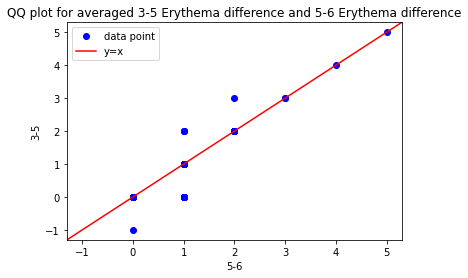

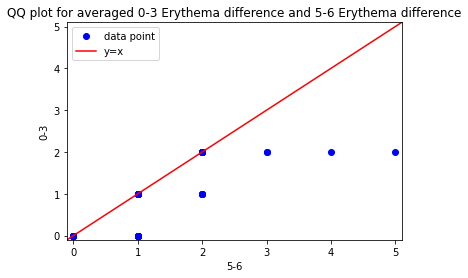

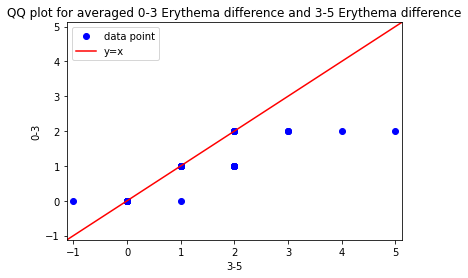

In [193]:
from statsmodels.graphics.gofplots import qqplot_2samples
qqplot_2samples(df_ery['3-5'],df_ery['5-6'],line="45",xlabel="5-6",ylabel="3-5")
plt.title("QQ plot for averaged 3-5 Erythema difference and 5-6 Erythema difference")
plt.legend(["data point","y=x"])
plt.show()
qqplot_2samples(df_ery['0-3'],df_ery['5-6'],line="45",xlabel="5-6",ylabel="0-3")
plt.title("QQ plot for averaged 0-3 Erythema difference and 5-6 Erythema difference")
plt.legend(["data point","y=x"])
plt.show()
qqplot_2samples(df_ery['0-3'],df_ery['3-5'],line="45",xlabel="3-5",ylabel="0-3")
plt.title("QQ plot for averaged 0-3 Erythema difference and 3-5 Erythema difference")
plt.legend(["data point","y=x"])
plt.show()

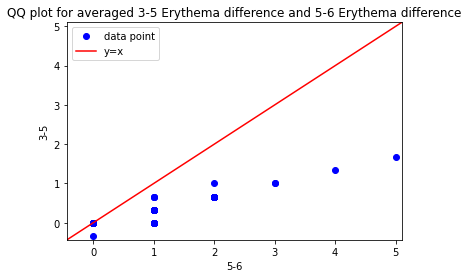

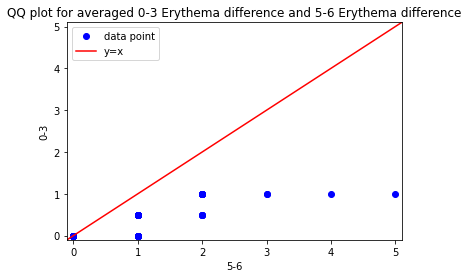

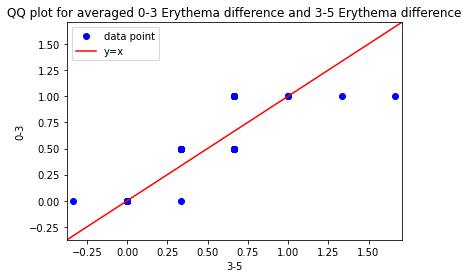

In [191]:
df_ery['0-3'] = (df_ery['3']-df_ery['0'])/2
df_ery['3-5'] = (df_ery['5']-df_ery['3'])/3
df_ery['5-6'] = df_ery['6']-df_ery['5']

from statsmodels.graphics.gofplots import qqplot_2samples
qqplot_2samples(df_ery['3-5'],df_ery['5-6'],line="45",xlabel="5-6",ylabel="3-5")
plt.title("QQ plot for averaged 3-5 Erythema difference and 5-6 Erythema difference")
plt.legend(["data point","y=x"])
plt.show()
qqplot_2samples(df_ery['0-3'],df_ery['5-6'],line="45",xlabel="5-6",ylabel="0-3")
plt.title("QQ plot for averaged 0-3 Erythema difference and 5-6 Erythema difference")
plt.legend(["data point","y=x"])
plt.show()
qqplot_2samples(df_ery['0-3'],df_ery['3-5'],line="45",xlabel="3-5",ylabel="0-3")
plt.title("QQ plot for averaged 0-3 Erythema difference and 3-5 Erythema difference")
plt.legend(["data point","y=x"])
plt.show()

-  if we don't average out the difference
3-5 and 5-6 difference look like they are likely to be from a same distribution. for one increase in diff of Erythema between A and B at time 3, there is 1.08 times increase in that at time 5, r-square is not very high, but expected since we only have discrete values

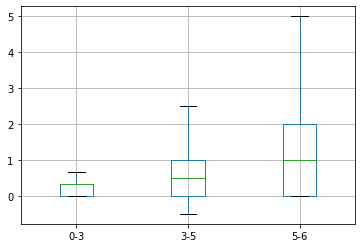

In [183]:
df_ery.boxplot(column=['0-3','3-5','5-6'])
plt.show()

'3-5','5-6' distribution pretty similar for Erythema

# difference between values by treatment at each time point

In [8]:
Etime0A = list(v11AB['Erythema_A']['0'])
Etime3A = list(v11AB['Erythema_A']['3'])
Etime5A = list(v11AB['Erythema_A']['5'])
Etime6A = list(v11AB['Erythema_A']['6'])

Etime0B = list(v11AB['Erythema_B']['0'])
Etime3B = list(v11AB['Erythema_B']['3'])
Etime5B = list(v11AB['Erythema_B']['5'])
Etime6B = list(v11AB['Erythema_B']['6'])

1.054179566563467 -1.7956656346749227


(1.054179566563468,
 -1.7956656346749225,
 0.6202617972453547,
 0.0009408949218614991,
 0.27797797325006557)

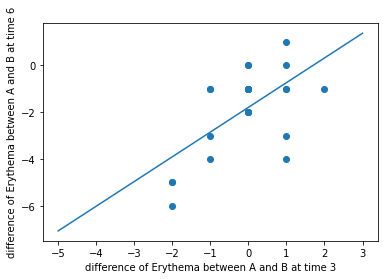

In [21]:
## doesn't make much sense for discrete values
# plt.scatter(np.array(Etime3B)-np.array(Etime3A),np.array(Etime6B)-np.array(Etime6A))
# # plt.ylim([-5,3])
# # plt.xlim([-5,3])
# plt.xlabel('difference of Erythema between A and B at time 3')
# plt.ylabel('difference of Erythema between A and B at time 6')
# m, b = np.polyfit( np.array(Etime3B)-np.array(Etime3A),np.array(Etime6B)-np.array(Etime6A), 1)
# x = np.linspace(-5, 3, 100)
# plt.plot(x,m*x+b)
# print(m,b)
# from scipy.stats import linregress
# slope, intercept, r_value, p_value, std_err = linregress(np.array(Etime3B)-np.array(Etime3A),np.array(Etime6B)-np.array(Etime6A))
# slope, intercept, r_value, p_value, std_err

for one increase in diff of Erythema between A and B at time 3, there is 1.08 times increase in that at time 5, r-square is not very high, but expected since we only have discrete values. this method might not work very well since these are discrete points

## distribution of AB difference at each time, using histogram

0.08 1.0166612021711068


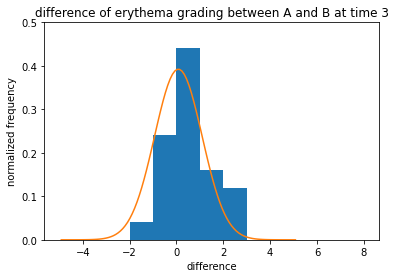

In [17]:
from scipy.stats import norm

# histogram plotting frequency of each frequency value
n, bins, patches = plt.hist(np.array(Etime3A)-np.array(Etime3B),bins=13,range=[-5,8],density=True)

# use an unskewed gaussian distribution to fit the histogram
(mu, sigma) = norm.fit(np.array(Etime3A)-np.array(Etime3B))
x = np.linspace(mu-5, mu+5, 100)
plt.plot(x, norm.pdf(x, mu, sigma))

## another way to find the best fit norm but doesn't look as good
## best_fit_line = norm.pdf(bins, mu, sigma)
## plt.plot(bins, best_fit_line)
plt.title("difference of erythema grading between A and B at time 3")
plt.ylabel("normalized frequency")
plt.xlabel("difference")
plt.ylim([0,0.5])
plt.savefig("reportplots/EryABdiffat3.png")
print(mu, sigma)


0.92 1.4945233353815524


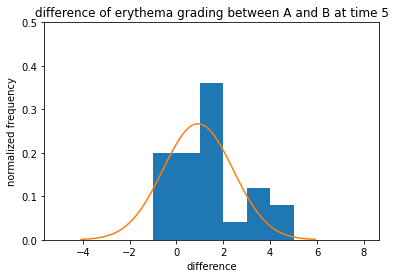

In [18]:
from scipy.stats import norm

# histogram plotting frequency of each frequency value
n, bins, patches = plt.hist(np.array(Etime5A)-np.array(Etime5B),bins=13,range=[-5,8],density=True)

# use an unskewed gaussian distribution to fit the histogram
(mu, sigma) = norm.fit(np.array(Etime5A)-np.array(Etime5B))
x = np.linspace(mu-5, mu+5, 100)
plt.plot(x, norm.pdf(x, mu, sigma))

## another way to find the best fit norm but doesn't look as good
## best_fit_line = norm.pdf(bins, mu, sigma)
## plt.plot(bins, best_fit_line)

plt.title("difference of erythema grading between A and B at time 5")
plt.ylabel("normalized frequency")
plt.xlabel("difference")
plt.ylim([0,0.5])
plt.savefig("reportplots/EryABdiffat5.png")

print(mu, sigma)



(1.88, 1.727888885316414)

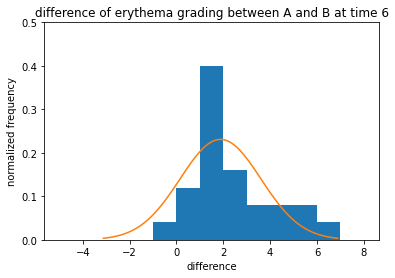

In [19]:
from scipy.stats import norm

# histogram plotting frequency of each frequency value
n, bins, patches = plt.hist(np.array(Etime6A)-np.array(Etime6B),bins=13,range=[-5,8],density=True)

# use an unskewed gaussian distribution to fit the histogram
(mu, sigma) = norm.fit(np.array(Etime6A)-np.array(Etime6B))
x = np.linspace(mu-5, mu+5, 100)
plt.plot(x, norm.pdf(x, mu, sigma))

## another way to find the best fit norm but doesn't look as good
## best_fit_line = norm.pdf(bins, mu, sigma)
## plt.plot(bins, best_fit_line)

plt.title("difference of erythema grading between A and B at time 6")
plt.ylabel("normalized frequency")
plt.xlabel("difference")
plt.ylim([0,0.5])
plt.savefig("reportplots/EryABdiffat6.png")

mu, sigma

we have reasonable amount of data (25) to detect distribution. we can see that the distribution starts out close to normal distribution, then becomes more and more right-skewed. The distribution also shifts its center.

If using the normal distribution mean,
- We start out with a mean ~0 and std ~1
- then shifts to a mean ~1 and std ~1.5
- finally at time 6, mean ~2 and std ~1.8
- This indicates that the difference in redness between treatment A and B becomes larger as time increases. The variation also increases as the difference take on a larger range of values as time increases.

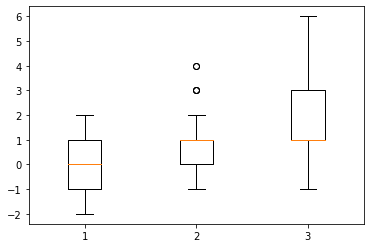

In [188]:
Edict = {'3':np.array(Etime3A)-np.array(Etime3B),'5':np.array(Etime5A)-np.array(Etime5B),'6':np.array(Etime6A)-np.array(Etime6B)}
plt.boxplot(Edict.values())
plt.show()

In [189]:
print(ttest_rel(np.array(Etime3A)-np.array(Etime3B),np.array(Etime5A)-np.array(Etime5B)))
print(ttest_rel(np.array(Etime3A)-np.array(Etime3B),np.array(Etime6A)-np.array(Etime6B)))
print(ttest_rel(np.array(Etime5A)-np.array(Etime5B),np.array(Etime6A)-np.array(Etime6B)))

Ttest_relResult(statistic=-4.085829941290785, pvalue=0.0004240770449155857)
Ttest_relResult(statistic=-6.500836066631537, pvalue=1.007788317590352e-06)
Ttest_relResult(statistic=-3.867950227321826, pvalue=0.0007351281776297572)


The redness diff value between treatment A and B differ significantly across time -> over time the redness diff caused by A and B seem to be increasing

In [2]:
! jupyter nbconvert Analysis_Erythema.ipynb --template toc2

[NbConvertApp] Converting notebook Analysis_Erythema.ipynb to html
[NbConvertApp] Writing 525270 bytes to Analysis_Erythema.html
